<a href="https://colab.research.google.com/github/Juliansin/Data-Science-I/blob/main/ProyectoDS_ParteI_Antunez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Campaña de marketing de banco
### Introducción al dataset elegido
El conjunto de datos utilizado se centra en **campañas de marketing directas de una institución bancaria portuguesa**. Estas estaban basadas en llamadas telefónicas, donde a menudo se requerían múltiples contactos con el mismo cliente para determinar si este último se suscribiría o no a un depósito a plazo fijo ofrecido por el banco.

Además de determinar la efectividad de las campañas, el conjunto de datos proporciona una amplia gama de características socioeconómicas y de comportamiento de los clientes que podrían influir en su decisión de suscribirse o no a un depósito a plazo fijo.

Las variables incluidas abarcan desde características demográficas como la edad y el estado civil, hasta información financiera como la situación crediticia y la participación en campañas de marketing anteriores. Adicionalmente presenta datos socioenónmicos como el índice de precios al consumidor del momento.

A partir de este conjunto de datos, trabajaremos sobre las siguientes hipótesis preliminares.



1.   La edad influye en la suscripción de depósitos a plazo fijo
1.   A mayor nivel educativo alcanzado es más probable invertir
1.   A mayor duración del contacto con el cliente mayor es la probabilidad de que suscriba depósitos a plazo fijo
2.   Tener créditos hipotecarios o personales impacta en la suscripción de depósitos a plazo fijo
2.   El contexto socioeconómico (tasa de empleo, índice de precios al consumidor, etc.) impacta en la suscripción a depósitos de plazo fijo


Fuente de la base de datos:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014. Recuperado en línea desde: https://www.kaggle.com/datasets/tunguz/bank-marketing-data-set

In [135]:
#Importo las librerías necesarias para el desarrollo del trabajo
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
mpl.style.use('seaborn-v0_8-pastel')

In [136]:
#Conecto a la carpeta de google drive
from google.colab import drive
import os
drive.mount('/content/gdrive/')
path = "/content/gdrive/MyDrive/DATA SCIENCE 1 - CODERHOUSE/"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [137]:
#Importo el archivo CSV, aclarando que se delimitan los valores con ';'.
df = pd.read_csv(path+'bank-additional-full.csv',sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [138]:
#Reviso el dataset de forma preliminar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Aprovecho para aclarar a qué hacen referencia las 21 columnas del dataset:

1.   age: Edad
2.   job: Condición laboral
1.   marital: Estado civil
2.   education: Nivel educativo alcanzado
1.   default: ¿Tiene deudas impagas?
2.   housing: ¿Tiene créditos hipotecarios vigentes?
1.   loan: ¿Tiene créditos personales vigentes?
2.   contact: Tipo de contacto con el cliente
1.   month: Mes del último contacto
2.   day_of_week: Día del último contacto
1.   duration: Duración (en segundos) del último contacto
2.   campaign: Número de contactos por campaña
1.   pdays: Días transcurridos desde por campañas anteriores hasta el actual (999 significa no contactado)
2.   previous: Número de contactos anteriores a la campaña vigente
1.   poutcome: Resultado de la campaña de marketing anterior
2.   emp.var.rate: Tasa de variación del empleo (trimestral)
1.   cons.price.idx: Índice de precios al consumidor (mensual)
2.   cons.conf.idx: índice de confianza del consumidor (mensual)
1.   euribor3m: Tasa de interés promedio euribor (trimestral)
2.   nr.employed: Número de empleados registrados (trimestral)
1.   y: ¿El potencial cliente suscribió un plazo fijo? (resultado de la campaña)



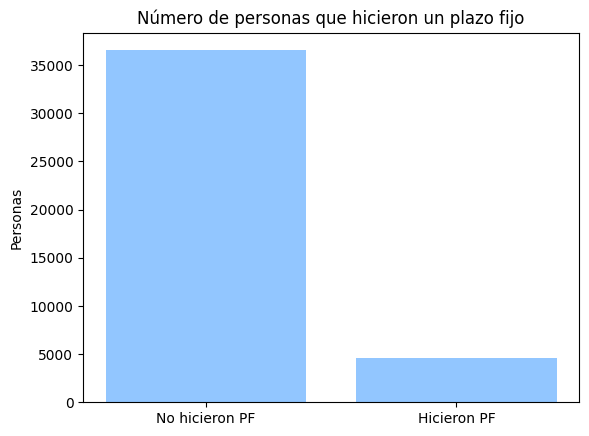

In [139]:
#Realizo un gráfico de barras
plazo_fijo = df['y'].value_counts()
plazo_fijo.index = ['No hicieron PF','Hicieron PF']
plt.bar(plazo_fijo.index, plazo_fijo.values)

plt.ylabel('Personas')
plt.title('Número de personas que hicieron un plazo fijo')

plt.show()

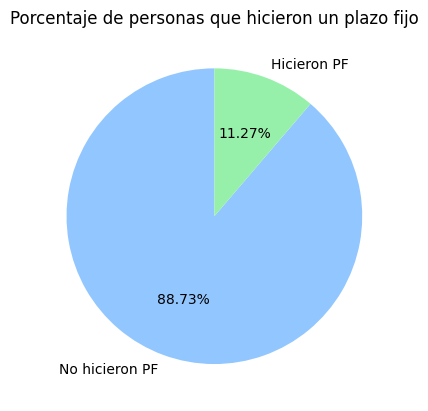

In [140]:
#Realizo un gráfico circular
plazo_fijo = df['y'].value_counts()
plazo_fijo.index = ['No hicieron PF','Hicieron PF']

plt.pie(plazo_fijo, labels=plazo_fijo.index, autopct='%1.2f%%', startangle=90)
plt.title('Porcentaje de personas que hicieron un plazo fijo')

plt.show()

## Hipótesis 1 - La edad influye en la suscripción de depósitos a plazo fijo: **FALSO**

Podemos observar que a pesar de que hay una tendencia hacia los 30 años entre los que si colocaron un plazo fijo, también la hay para los que fueron contactados pero no lo colocaron. La edad no determina la suscripción de depósitos a plazo fijo.

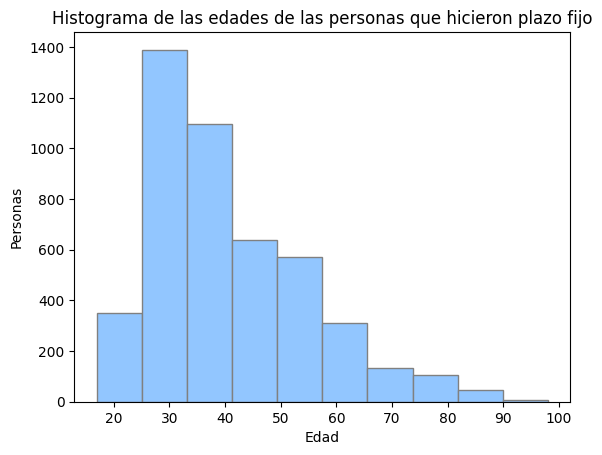

In [145]:
#Voy a continuar el análisis con los que sí hicieron un plazo fijo.
#Creo una dataframe que almacene sólo las filas cuyas personas si hicieron un plazo fijo.
plazo_fijo_si = df[df['y']=='yes']

#Creo un histograma con las edades de las personas que accedieron al PF
plt.hist(plazo_fijo_si['age'], edgecolor='gray')
plt.xlabel('Edad')
plt.ylabel('Personas')
plt.title('Histograma de las edades de las personas que hicieron plazo fijo')

plt.show()

En principio podemos observar que la edad si influye en la colocación de depósitos a plazo fijo, siendo al rededor de los 30 la edad más frecuente. Veamos la comparación con los que no hicieron un plazo fijo.

[Text(0.5, 0, 'Edad'), Text(0, 0.5, 'Personas')]

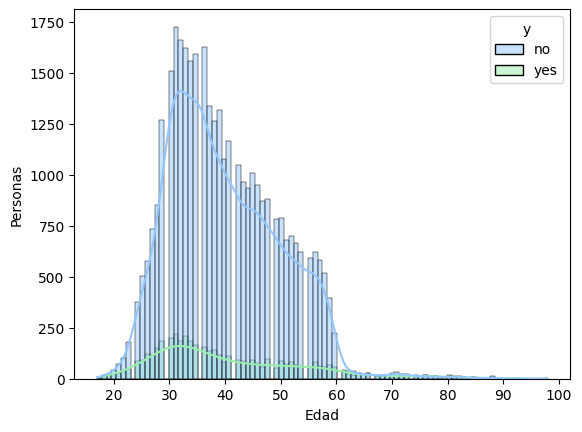

In [156]:
#Creo un histograma con todos las personas contactadas, independientemente de si hicieron o no un plazo fijo.
hist_edad = sns.histplot(data=df, x="age", hue="y", kde=True)
hist_edad.set(xlabel='Edad', ylabel='Personas')

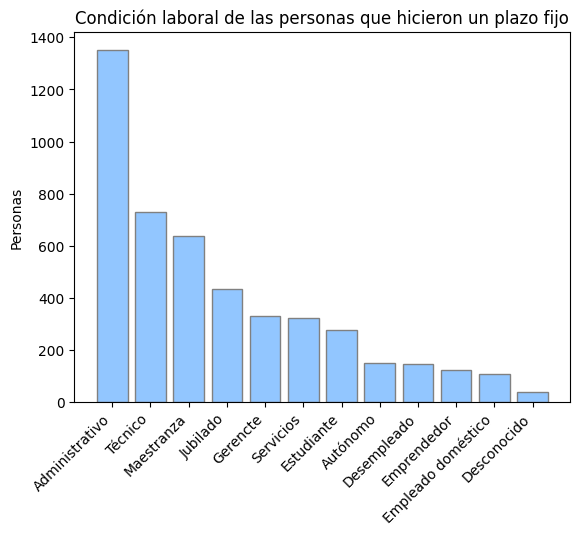

In [20]:
#Creo un diagrama de barras con las condiciones laborales
plazo_fijo_cond_lab = plazo_fijo_si['job'].value_counts()
plazo_fijo_cond_lab.index = ['Administrativo', 'Técnico', 'Maestranza', 'Jubilado', 'Gerencte', 'Servicios', 'Estudiante', 'Autónomo', 'Desempleado', 'Emprendedor', 'Empleado doméstico', 'Desconocido']
plt.bar(plazo_fijo_cond_lab.index, plazo_fijo_cond_lab.values, edgecolor="gray")
#Giro las etiquetas en el eje x para que no se superpongan
plt.xticks(rotation=45, ha='right')
plt.ylabel('Personas')
plt.title('Condición laboral de las personas que hicieron un plazo fijo')

plt.show()

## Hipótesis 2 - A mayor nivel educativo alcanzado es más probable invertir: **VERDADERO**

Podemos observar que la frecuencia de colocación de depósitos es mayor cuando más alto es el nivel educativo alcanzado (en este caso, universitario) y disminuye progresivamente hasta el nivel más bajo (sin educación, analfabetismo).

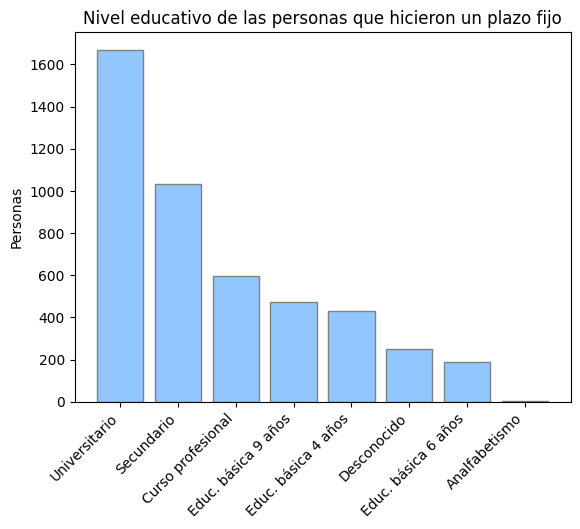

In [173]:
#Creo un diagrama de barras con el nivel educativo alcanzado de las personas que si hicieron un plazo fijo.
plazo_fijo_edu = plazo_fijo_si['education'].value_counts()
plazo_fijo_edu.index = ['Universitario', 'Secundario', 'Curso profesional', 'Educ. básica 9 años', 'Educ. básica 4 años','Desconocido','Educ. básica 6 años','Analfabetismo']
plt.bar(plazo_fijo_edu.index, plazo_fijo_edu.values, edgecolor="gray")
#Giro las etiquetas en el eje x para que no se superpongan
plt.xticks(rotation=45, ha='right')
plt.ylabel('Personas')
plt.title('Nivel educativo de las personas que hicieron un plazo fijo')

plt.show()

## Hipótesis 3 - A mayor duración del contacto con el cliente mayor es la probabilidad de que suscriba depósitos a plazo fijo: **FALSO**

Podemos observar en el gráfico siguiente que, sin importar el medio de contacto utilizado, a mayor duración del contacto, menor es la cantidad de personas que terminó colocando un plazo fijo. Al contrario, cuanto menor es la duración, parece ser mayor la posibliidad.

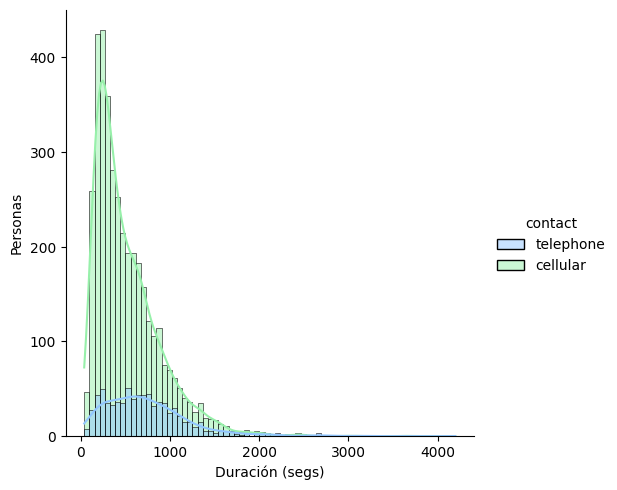

In [148]:
#Creo un gráfico de barras que compare la duración del contacto en segundos y el canal utilizado.
grafico = sns.displot(data=plazo_fijo_si, x="duration", hue="contact", kde=True)
grafico.set(xlabel='Duración (segs)', ylabel='Personas')
plt.show()

## Hipótesis 4 - Tener créditos hipotecarios o personales vigentes impacta en la suscripción de depósitos a plazo fijo: **FALSO**

Podemos observar en el gráfico siguiente que, la proporción de personas que realizaron un plazo fijo entre los que no tienen un crédito es muy similar a la de los que si lo tienen (tanto personal como hipotecario). De esto inferimos que tener un crédito no afecta la decisión de colocar un plazo fijo.

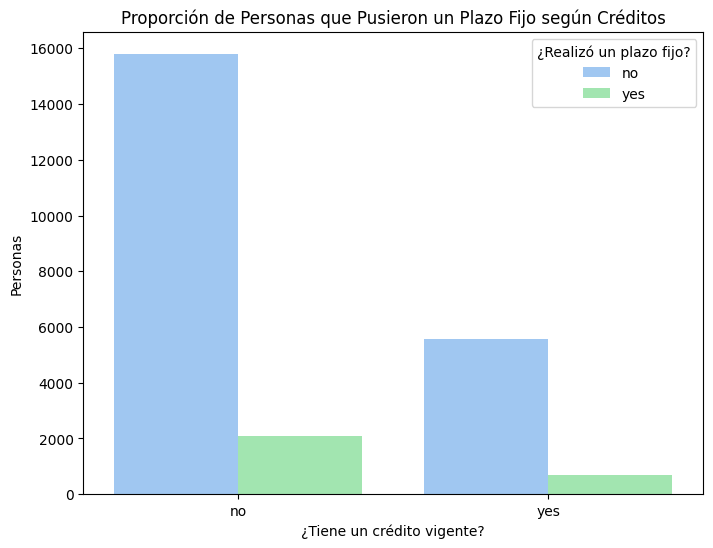

In [175]:
# Copio el dataframe origina filtrando los que tengan un crédito personal o hipotecario.
df_creditos = df[(df['loan'] == 'yes') | (df['housing'] == 'yes')]

# Sumo la cantidad de personas que sí pusieron un plazo fijo y las que no
contar = df_creditos.groupby(['loan', 'y']).size().reset_index(name='recuento')
plt.figure(figsize=(8, 6))
sns.barplot(data=contar, x='loan', y='recuento', hue='y')
plt.title('Proporción de Personas que Pusieron un Plazo Fijo según Créditos')
plt.xlabel('¿Tiene un crédito vigente?')
plt.ylabel('Personas')
plt.legend(title='¿Realizó un plazo fijo?')
plt.show()

#No supe como cambiar las etiquetas yes y no del eje x y de la referencia al plazo fijo.

## Hipótesis 5 - El contexto socioeconómico (tasa de empleo, índice de precios al consumidor, etc.) impacta en la suscripción a depósitos de plazo fijo.

En principio voy a generar un mapa de calor para constatar entre mis variables numéricas la posibliidad de identificar una correlacion positiva o negativa.

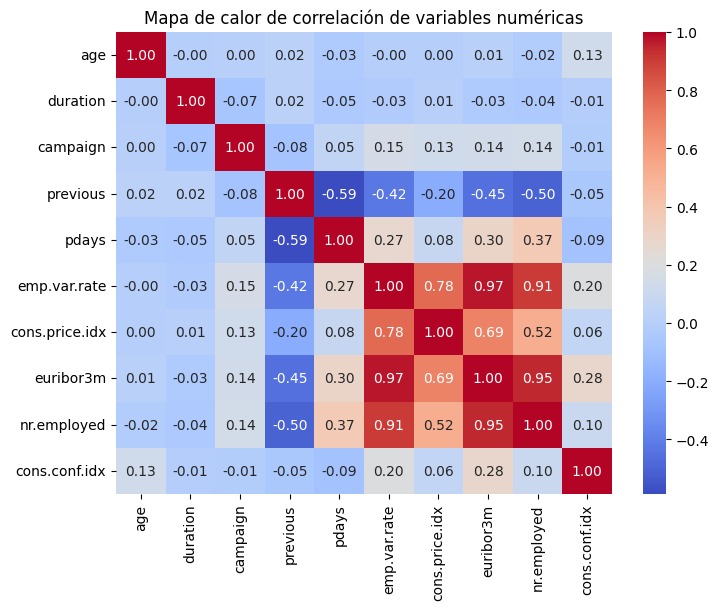

In [86]:
#Voy a preparar un mapa de calor de correlación entre variables para otener información rápida sobre posibles dinámicas
# Selecciono las variables numéricas
variables_numericas = ['age', 'duration', 'campaign', 'previous', 'pdays','emp.var.rate','cons.price.idx','euribor3m','nr.employed','cons.conf.idx']
matriz_correlacion = df[variables_numericas].corr()
# Creo el mapa de calor de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación de variables numéricas')
plt.show()

Con este gráfico podemos ver rapidamnete si existe correlación (de acuerdo al coeficiente de Pearson entre -1 y +1) entre todas las variables numéricas de nuestro dataset. Sirve como primer acercamiento a la dinámica entre estas, pero merece algunas observaciones.

1.   El análisis de correlación entre variables no siempre es significativo. Por ejemplo, no tiene sentido comparar la duración del contacto con el cliente con el índice de precios al consumidor.
2.   Algunas variables se observan correlativas, pero exceden a nuestro análisis. Por ejemplo, el número de empleados en la economía se correlaciona positivamente con el índice euribor trimestral, pero no es mi propósito hacer un análisis de las condiciones socioeconómicas.

Dicho esto, la única correlación que no se ajusta a ninguna de las observaciones anteriores, y que merece la pena revisar, es la correlación entre el número de dias transcurridos desde que el banco contactó a un potencial cliente por campañas anteriores (pdays), y el número de contactos realizados con anterioridad a la campaña actual (previous), que en principio parecen tener una correlación negativa de -0.59. Veamos esta relación con una nube de puntos.



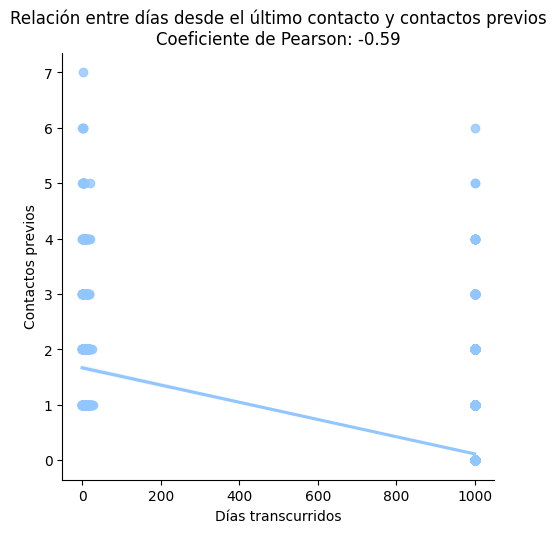

In [149]:
# Calcular el coeficiente de correlación de Pearson
correlacion_pearson = df['pdays'].corr(df['previous'])

# Creo el gráfico de dispersión
sns.lmplot(data=df, x='pdays', y='previous')
plt.title('Relación entre días desde el último contacto y contactos previos\nCoeficiente de Pearson: {:.2f}'.format(correlacion_pearson))
plt.xlabel('Días transcurridos')
plt.ylabel('Contactos previos')
plt.show()

Podemos observar que en realidad no existe correlación, si no que utilizar el valor 999 para indicar que un cliente no previamente contactado genera distorsiones en el análisis. Quizás con un 0 hubiese reflejado la ausencia de correlación.

Luego de verificar los datos y su posible correlación, concluyo que no se cuenta con datos suficientes (en este dataset) para determinar si las condiciones macroeconómicas influyen en la decisión de colocar un depósito a plazo fijo.